# Proyecto 1: Regresión Lineal

# Parte 1: Preparación y Exploracion

In [29]:
# carga de libererías:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

### Carga del dataset. 

In [30]:
# Cargamos el dataset
df = pd.read_csv('dataset_proyecto_regresion.csv')

### EDA básica y Detección de outliers: 


--- EDA Básica ---

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1500 non-null   int64  
 1   RegistrationDate        1500 non-null   object 
 2   Age                     1455 non-null   float64
 3   AnnualIncome            1455 non-null   float64
 4   EducationLevel          1475 non-null   object 
 5   Gender                  1468 non-null   object 
 6   MaritalStatus           1195 non-null   object 
 7   Children                1500 non-null   int64  
 8   Employed                1404 non-null   object 
 9   JobTitle                1500 non-null   object 
 10  HoursPerWeek            1500 non-null   float64
 11  CommuteDistance         1500 non-null   float64
 12  CreditScore             1455 non-null   float64
 13  Debt                    1455 non-null

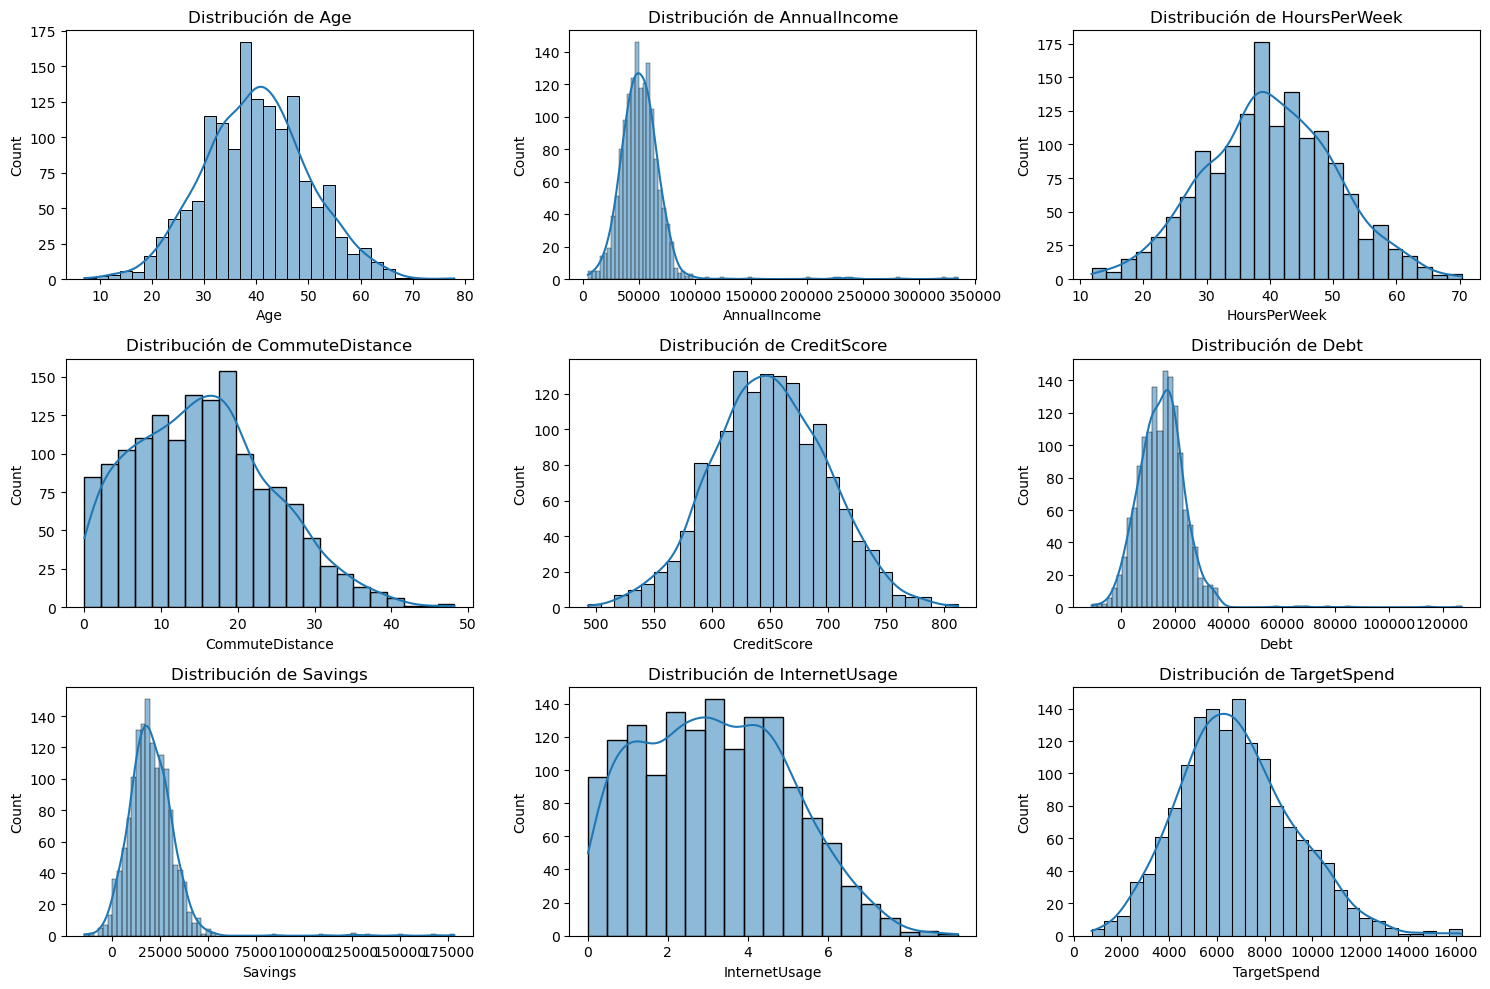

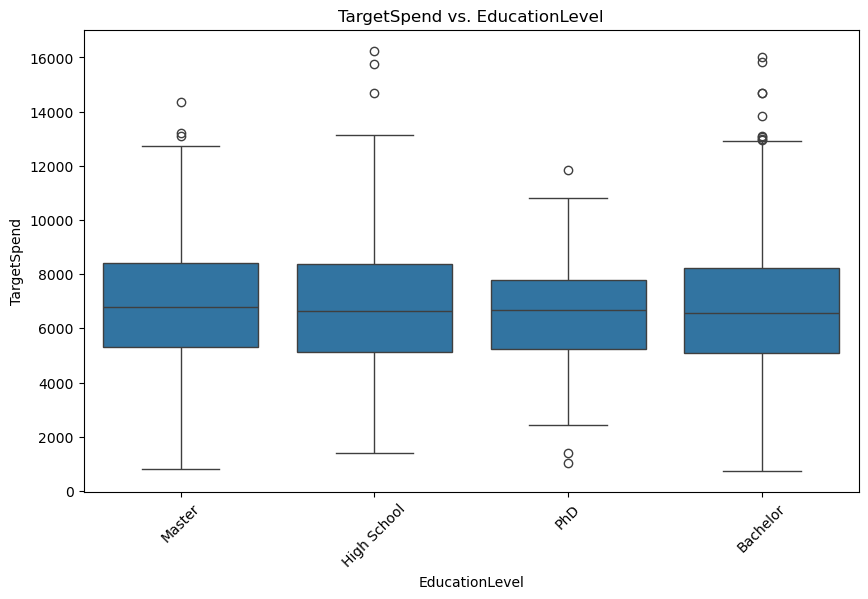

In [31]:
# --- 2. EDA Básica --- 

print("\n--- EDA Básica ---")

# a. Distribución y tipos de variables
print("\nInformación general del DataFrame:")
df.info()

print("\nPrimeras 5 filas del DataFrame:")
print(df.head())

print("\nEstadísticas descriptivas de las variables numéricas:")
print(df.describe())

# b. Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())
print("\nPorcentaje de valores faltantes por columna:")
print((df.isnull().sum() / len(df)) * 100)

# c. Distribución de variables categóricas
print("\nDistribución de variables categóricas:")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nColumna: {col}")
    print(df[col].value_counts())
    print(f"Número de categorías únicas: {df[col].nunique()}")


# Visualización de distribuciones para variables numéricas clave
numeric_cols_for_hist = ['Age', 'AnnualIncome', 'HoursPerWeek', 'CommuteDistance', 'CreditScore', 'Debt', 'Savings', 'InternetUsage', 'TargetSpend']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols_for_hist):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

# Visualización para variables categóricas importantes 
plt.figure(figsize=(10, 6))
sns.boxplot(x='EducationLevel', y='TargetSpend', data=df)
plt.title('TargetSpend vs. EducationLevel')
plt.xticks(rotation=45)
plt.show()

### Manejo de valores faltantes: imputación categórica y numérica. 

In [32]:
# --- Manejo de Valores Faltantes: Imputación Categórica y Numérica ---

# Imputación de valores faltantes para variables categóricas (usando la moda)
# Columnas identificadas con NaN en el EDA:
# 'MaritalStatus': 305 NaN
# 'Employed': 96 NaN
# 'OwnsHouse': 74 NaN
# 'EducationLevel': 25 NaN
# 'Gender': 32 NaN
categorical_cols_to_impute = ['MaritalStatus', 'Employed', 'OwnsHouse', 'EducationLevel', 'Gender']

for col in categorical_cols_to_impute:
    if df[col].isnull().any(): # Solo imputar si hay NaNs en la columna
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

# Imputación de valores faltantes para variables numéricas (usando la mediana)
# Columnas identificadas con NaN en el EDA:
# 'Age': 45 NaN
# 'AnnualIncome': 45 NaN
# 'CreditScore': 45 NaN
# 'Debt': 45 NaN
# 'Savings': 45 NaN
numeric_cols_to_impute = ['Age', 'AnnualIncome', 'CreditScore', 'Debt', 'Savings']

for col in numeric_cols_to_impute:
    if df[col].isnull().any(): # Solo imputar si hay NaNs en la columna
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

# Confirmar que no hay valores faltantes después de la imputación
print("Valores faltantes después de la imputación:")
print(df.isnull().sum())

print("\nPrimeras 5 filas del DataFrame después de la imputación:")
print(df.head())

Valores faltantes después de la imputación:
ID                        0
RegistrationDate          0
Age                       0
AnnualIncome              0
EducationLevel            0
Gender                    0
MaritalStatus             0
Children                  0
Employed                  0
JobTitle                  0
HoursPerWeek              0
CommuteDistance           0
CreditScore               0
Debt                      0
Savings                   0
OwnsHouse                 0
InternetUsage             0
HasPet                    0
FitnessLevel              0
EnvironmentalAwareness    0
TargetSpend               0
dtype: int64

Primeras 5 filas del DataFrame después de la imputación:
   ID RegistrationDate   Age  AnnualIncome EducationLevel  Gender  \
0   1       2022-03-04  44.0      61675.42         Master  Female   
1   2       2016-04-01  38.0      41732.21       Bachelor  Female   
2   3       2015-04-13  46.0      37727.02    High School    Male   
3   4       2023-04-2

C:\Users\gabri\AppData\Local\Temp\ipykernel_21860\1377410379.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)
C:\Users\gabri\AppData\Local\Temp\ipykernel_21860\1377410379.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

### Conversión de fechas: extraer características como AñosDesdeRegistro.

In [33]:
# --- Manejo de Fechas: Conversión y Extracción de Características ---

# Convertir 'RegistrationDate' a formato datetime
df['RegistrationDate'] = pd.to_datetime(df['RegistrationDate'], errors='coerce')

# Calcular la antigüedad del registro en años
# Usamos la fecha actual (June 6, 2025) como referencia para 'AñosDesdeRegistro'.
# Esto asegura consistencia en el cálculo de la antigüedad.
reference_date = pd.Timestamp('2025-06-06') # Fecha de referencia explícita
df['YearsSinceRegistration'] = (reference_date - df['RegistrationDate']).dt.days / 365.25

# Extraer otras características de la fecha
# Por ejemplo, el mes de registro podría capturar estacionalidad en el gasto.
df['RegistrationMonth'] = df['RegistrationDate'].dt.month
# df['RegistrationDayOfWeek'] = df['RegistrationDate'].dt.dayofweek # 0=Lunes, 6=Domingo

# Eliminar la columna 'RegistrationDate' original
df = df.drop('RegistrationDate', axis=1)

print("\nPrimeras 5 filas del DataFrame después del manejo de fechas:")
print(df.head())

print("\nTipos de datos del DataFrame después del manejo de fechas:")
df.info()


Primeras 5 filas del DataFrame después del manejo de fechas:
   ID   Age  AnnualIncome EducationLevel  Gender MaritalStatus  Children  \
0   1  44.0      61675.42         Master  Female       Married         3   
1   2  38.0      41732.21       Bachelor  Female      Divorced         1   
2   3  46.0      37727.02    High School    Male        Single         0   
3   4  55.0      49949.38            PhD  Female      Divorced         1   
4   5  37.0      47447.23       Bachelor    Male        Single         2   

  Employed    JobTitle  HoursPerWeek  ...      Debt   Savings  OwnsHouse  \
0      Yes       Other     68.383964  ...   9077.87  24771.06         No   
1       No      Lawyer     22.073748  ...    606.62  22441.40        Yes   
2      Yes  Unemployed     20.023119  ...  25288.83  11134.33        Yes   
3      Yes      Artist     26.169590  ...   5725.61  12268.86         No   
4      Yes     Teacher     51.016055  ...   7208.28  17036.88        Yes   

   InternetUsage HasPet 

# Parte 2: Ingeniería de Características

### Encoding de variables categóricas: OneHotEncoding y OrdinalEncoding.

In [34]:
# Columnas categóricas nominales
categorical_nominal_cols = ['EducationLevel', 'Gender', 'MaritalStatus', 'Employed', 'JobTitle', 'OwnsHouse', 'HasPet']

# Columnas categóricas ordinales
ordinal_cols = ['FitnessLevel', 'EnvironmentalAwareness']


print("--- Categorías y conteos para variables Categóricas Nominales ---")
for col in categorical_nominal_cols:
    print(f"\nColumna: '{col}'")
    print(df[col].value_counts())
    print(f"Número de categorías únicas: {df[col].nunique()}")

print("\n--- Categorías y conteos para variables Categóricas Ordinales ---")
for col in ordinal_cols:
    print(f"\nColumna: '{col}'")
    print(df[col].value_counts())
    print(f"Número de categorías únicas: {df[col].nunique()}")


--- Categorías y conteos para variables Categóricas Nominales ---

Columna: 'EducationLevel'
EducationLevel
Bachelor       652
High School    449
Master         280
PhD            119
Name: count, dtype: int64
Número de categorías únicas: 4

Columna: 'Gender'
Gender
Male      759
Female    704
Other      37
Name: count, dtype: int64
Número de categorías únicas: 3

Columna: 'MaritalStatus'
MaritalStatus
Single      646
Divorced    300
Married     284
Widowed     270
Name: count, dtype: int64
Número de categorías únicas: 4

Columna: 'Employed'
Employed
Yes    1150
No      350
Name: count, dtype: int64
Número de categorías únicas: 2

Columna: 'JobTitle'
JobTitle
Teacher       252
Engineer      217
Artist        214
Doctor        213
Other         207
Unemployed    206
Lawyer        191
Name: count, dtype: int64
Número de categorías únicas: 7

Columna: 'OwnsHouse'
OwnsHouse
Yes    968
No     532
Name: count, dtype: int64
Número de categorías únicas: 2

Columna: 'HasPet'
HasPet
Yes    765
N

In [35]:
from sklearn.preprocessing import OrdinalEncoder

# --- Encoding de Variables Categóricas ---

# Codificación One-Hot para variables nominales
categorical_nominal_cols = ['EducationLevel', 'Gender', 'MaritalStatus', 'Employed', 'JobTitle', 'OwnsHouse', 'HasPet']
df = pd.get_dummies(df, columns=categorical_nominal_cols, drop_first=True)

# Codificación Ordinal para variables ordinales
ordinal_cols = ['FitnessLevel', 'EnvironmentalAwareness']
# Asegurar que estas columnas sean de tipo 'category' con un orden explícito si no lo están ya
# Esto es redundante si ya se hizo, pero seguro si el estado de df no es consistente
df['FitnessLevel'] = pd.Categorical(df['FitnessLevel'], categories=[1, 2, 3, 4, 5], ordered=True)
df['EnvironmentalAwareness'] = pd.Categorical(df['EnvironmentalAwareness'], categories=[1, 2, 3, 4, 5], ordered=True)

# El encoder usará el orden especificado: [1, 2, 3, 4, 5]
encoder = OrdinalEncoder(categories=[[1, 2, 3, 4, 5], [1, 2, 3, 4, 5]])
df[ordinal_cols] = encoder.fit_transform(df[ordinal_cols])


print("\nPrimeras 5 filas del DataFrame después del encoding:")
print(df.head())

print("\nTipos de datos del DataFrame después del encoding:")
df.info()


Primeras 5 filas del DataFrame después del encoding:
   ID   Age  AnnualIncome  Children  HoursPerWeek  CommuteDistance  \
0   1  44.0      61675.42         3     68.383964            15.23   
1   2  38.0      41732.21         1     22.073748             7.03   
2   3  46.0      37727.02         0     20.023119            17.74   
3   4  55.0      49949.38         1     26.169590             6.79   
4   5  37.0      47447.23         2     51.016055            24.50   

   CreditScore      Debt   Savings  InternetUsage  ...  MaritalStatus_Widowed  \
0   576.809804   9077.87  24771.06           0.04  ...                  False   
1   664.493610    606.62  22441.40           3.36  ...                  False   
2   661.075218  25288.83  11134.33           1.70  ...                  False   
3   578.804376   5725.61  12268.86           0.69  ...                  False   
4   714.386513   7208.28  17036.88           3.05  ...                  False   

   Employed_Yes  JobTitle_Doctor  JobT

### Escalado: MinMaxScaler o StandardScaler. 

In [36]:
# --- Escalado de Características Numéricas ---

# Identificar todas las columnas numéricas para escalar, excluyendo la variable objetivo 'TargetSpend'
numeric_cols_to_scale = df.select_dtypes(include=np.number).columns.tolist()
if 'TargetSpend' in numeric_cols_to_scale:
    numeric_cols_to_scale.remove('TargetSpend')

scaler = StandardScaler()
df[numeric_cols_to_scale] = scaler.fit_transform(df[numeric_cols_to_scale])


print("\nPrimeras 5 filas del DataFrame después del escalado:")
print(df.head())

print("\nTipos de datos del DataFrame después del escalado:")
df.info()


Primeras 5 filas del DataFrame después del escalado:
         ID       Age  AnnualIncome  Children  HoursPerWeek  CommuteDistance  \
0 -1.730896  0.409428      0.472780  1.279847      2.784057        -0.030461   
1 -1.728587 -0.206150     -0.454342 -0.419817     -1.766420        -0.942546   
2 -1.726278  0.614621     -0.640536 -1.269649     -1.967917         0.248726   
3 -1.723968  1.537989     -0.072342 -0.419817     -1.363960        -0.969241   
4 -1.721659 -0.308747     -0.188662  0.430015      1.077473         1.000640   

   CreditScore      Debt   Savings  InternetUsage  ...  MaritalStatus_Widowed  \
0    -1.505990 -0.677733  0.319500      -1.707723  ...                  False   
1     0.303751 -1.595174  0.142354       0.110246  ...                  False   
2     0.233198  1.077921 -0.717428      -0.798738  ...                  False   
3    -1.464823 -1.040785 -0.631159      -1.351795  ...                  False   
4     1.333511 -0.880211 -0.268602      -0.059504  ...      

### Discretización (binning): aplicar a Age, Debt, o CreditScore.

In [37]:
# --- Discretización (Binning) en 'Age' ---

# Discretización de 'Age' usando cuantiles (bins de igual frecuencia)
df['Age_Group'] = pd.qcut(df['Age'], q=5, labels=['Grupo_1', 'Grupo_2', 'Grupo_3', 'Grupo_4', 'Grupo_5'], precision=0)

# La nueva columna 'Age_Group' es de tipo categórico.
# Para su uso en modelos lineales, típicamente se aplicaría One-Hot Encoding a 'Age_Group' también.

print("\nPrimeras 5 filas del DataFrame después de la discretización de Age:")
print(df.head())

print("\nConteo de categorías en 'Age_Group':")
print(df['Age_Group'].value_counts())

print("\nTipos de datos del DataFrame después de la discretización:")
df.info()


Primeras 5 filas del DataFrame después de la discretización de Age:
         ID       Age  AnnualIncome  Children  HoursPerWeek  CommuteDistance  \
0 -1.730896  0.409428      0.472780  1.279847      2.784057        -0.030461   
1 -1.728587 -0.206150     -0.454342 -0.419817     -1.766420        -0.942546   
2 -1.726278  0.614621     -0.640536 -1.269649     -1.967917         0.248726   
3 -1.723968  1.537989     -0.072342 -0.419817     -1.363960        -0.969241   
4 -1.721659 -0.308747     -0.188662  0.430015      1.077473         1.000640   

   CreditScore      Debt   Savings  InternetUsage  ...  Employed_Yes  \
0    -1.505990 -0.677733  0.319500      -1.707723  ...          True   
1     0.303751 -1.595174  0.142354       0.110246  ...         False   
2     0.233198  1.077921 -0.717428      -0.798738  ...          True   
3    -1.464823 -1.040785 -0.631159      -1.351795  ...          True   
4     1.333511 -0.880211 -0.268602      -0.059504  ...          True   

   JobTitle_Docto

In [38]:
from sklearn.preprocessing import  PolynomialFeatures
# --- Transformaciones Polinómicas ---

# Seleccionar características para las transformaciones polinómicas.
# Elegimos 'Age' y 'AnnualIncome' ya que son variables clave 
features_for_polynomial = ['Age', 'AnnualIncome']

# Crear objeto PolynomialFeatures con grado 2 (para términos cuadrados e interacciones)
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transformar las características seleccionadas
# Esto creará un array numpy con las nuevas características polinómicas
poly_features = poly.fit_transform(df[features_for_polynomial])

# Obtener los nombres de las nuevas características generadas
poly_feature_names = poly.get_feature_names_out(features_for_polynomial)

# Crear un DataFrame con las nuevas características polinómicas
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names, index=df.index)

# Concatenar las nuevas características polinómicas al DataFrame original
df = pd.concat([df, df_poly], axis=1)


print("\nPrimeras 5 filas del DataFrame después de las transformaciones polinómicas:")
print(df.head())

print("\nTipos de datos del DataFrame después de las transformaciones polinómicas:")
df.info()


Primeras 5 filas del DataFrame después de las transformaciones polinómicas:
         ID       Age  AnnualIncome  Children  HoursPerWeek  CommuteDistance  \
0 -1.730896  0.409428      0.472780  1.279847      2.784057        -0.030461   
1 -1.728587 -0.206150     -0.454342 -0.419817     -1.766420        -0.942546   
2 -1.726278  0.614621     -0.640536 -1.269649     -1.967917         0.248726   
3 -1.723968  1.537989     -0.072342 -0.419817     -1.363960        -0.969241   
4 -1.721659 -0.308747     -0.188662  0.430015      1.077473         1.000640   

   CreditScore      Debt   Savings  InternetUsage  ...  JobTitle_Teacher  \
0    -1.505990 -0.677733  0.319500      -1.707723  ...             False   
1     0.303751 -1.595174  0.142354       0.110246  ...             False   
2     0.233198  1.077921 -0.717428      -0.798738  ...             False   
3    -1.464823 -1.040785 -0.631159      -1.351795  ...             False   
4     1.333511 -0.880211 -0.268602      -0.059504  ...        

# Parte 3: Modelado 

### División de datos: entrenamiento y prueba (80/20). 

In [39]:
# --- División de Datos: Entrenamiento y Prueba (80/20) ---

# Separar la variable objetivo (y) de las características (X)
X = df.drop('TargetSpend', axis=1)
y = df['TargetSpend']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nDimensiones de los conjuntos de datos:")
print(f"X_train (entrenamiento de características): {X_train.shape}")
print(f"y_train (entrenamiento de objetivo): {y_train.shape}")
print(f"X_test (prueba de características): {X_test.shape}")
print(f"y_test (prueba de objetivo): {y_test.shape}")


Dimensiones de los conjuntos de datos:
X_train (entrenamiento de características): (1200, 37)
y_train (entrenamiento de objetivo): (1200,)
X_test (prueba de características): (300, 37)
y_test (prueba de objetivo): (300,)


### Construcción de pipelines personalizados con BaseEstimator y TransformerMixin. 


--- Definición de Pipelines Personalizados Completa ---
Las clases `Log1pCustomTransformer` y `AgeBinningCustomTransformer` han sido definidas.
La estructura del `preprocessor_pipeline` está lista, combinando transformadores personalizados y de Scikit-learn.
Este pipeline se ajustaría a los datos de entrenamiento (crudos o con imputación/fechas básicas) y luego se usaría para transformar ambos conjuntos.


In [ ]:
import pandas as pd # Necesario para pd.DataFrame, .drop, .columns.tolist()
from sklearn.model_selection import train_test_split # Necesario para train_test_split
from sklearn.linear_model import LinearRegression # Necesario para el modelo
from sklearn.metrics import mean_squared_error, r2_score # Necesario para la evaluación
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, PolynomialFeatures # Necesario para ColumnTransformer y Pipelines internos
from sklearn.compose import ColumnTransformer # Necesario para ColumnTransformer
from sklearn.pipeline import Pipeline # Necesario para Pipeline


# Separar características (X) y objetivo (y) antes de aplicar el pipeline
X_pre_pipeline = df.drop('TargetSpend', axis=1) # CORREGIDO: Usando 'df'
y = df['TargetSpend'] # CORREGIDO: Usando 'df'

# Dividir los datos (esto se hace sobre los datos 'crudos' o básicos para que el pipeline los procese)
X_train_pre_pipeline, X_test_pre_pipeline, y_train, y_test = train_test_split(
    X_pre_pipeline, y, test_size=0.2, random_state=42
)

# Aplicar el pre-transformer pipeline para generar las columnas intermedias
X_train_temp = pre_transformer_pipeline.fit_transform(X_train_pre_pipeline)
X_test_temp = pre_transformer_pipeline.transform(X_test_pre_pipeline)

# Convertir los resultados de las transformaciones a DataFrame para facilitar el manejo posterior
original_cols_excluding_target = X_pre_pipeline.columns.tolist()
all_temp_cols = original_cols_excluding_target + ['Age_Group']

X_train_temp = pd.DataFrame(X_train_temp, columns=all_temp_cols, index=X_train_pre_pipeline.index)
X_test_temp = pd.DataFrame(X_test_temp, columns=all_temp_cols, index=X_test_pre_pipeline.index)


# ColumnTransformer principal
full_feature_processor = ColumnTransformer(
    transformers=[
        # Aplicar polinómicas y escalar a las características numéricas
        ('numeric_processing', Pipeline([
            ('poly', PolynomialFeatures(degree=2, include_bias=False)),
            ('scaler', StandardScaler())
        ]), features_for_poly_and_scale),

        # Codificación Ordinal
        ('ordinal_encode', OrdinalEncoder(categories=[[1, 2, 3, 4, 5], [1, 2, 3, 4, 5]]), ordinal_cols),

        # Codificación One-Hot para las nominales
        ('onehot_encode', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), final_nominal_cols_for_ohe)
    ],
    remainder='drop' # Ignora cualquier columna no especificada
)

# Pipeline Completo: Preprocesamiento + Modelo
model_pipeline = Pipeline(steps=[
    ('full_preprocessing', full_feature_processor),
    ('regressor', LinearRegression()) # Tu modelo final
])

# --- Entrenamiento del Pipeline ---
print("\n--- Entrenamiento del Pipeline Completo ---")
print("Ajustando el pipeline de preprocesamiento y el modelo en los datos de entrenamiento...")
model_pipeline.fit(X_train_temp, y_train)

print("\nPipeline ajustado exitosamente.")

# --- Evaluación del Modelo ---
print("\n--- Evaluación del Modelo ---")
y_pred_train = model_pipeline.predict(X_train_temp)
y_pred_test = model_pipeline.predict(X_test_temp)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"MSE en el conjunto de entrenamiento: {mse_train:.2f}")
print(f"R^2 en el conjunto de entrenamiento: {r2_train:.2f}")
print(f"MSE en el conjunto de prueba: {mse_test:.2f}")
print(f"R^2 en el conjunto de prueba: {r2_test:.2f}")

print("\n--- Pipeline Completo con ColumnTransformer listo para usar ---")
# Para ver las dimensiones finales de las características procesadas:
# print(model_pipeline.named_steps['full_preprocessing'].transform(X_train_temp).shape)

NameError: name 'pre_transformer_pipeline' is not defined